<a href="https://colab.research.google.com/github/sergfer26/Proyectos-II/blob/main/semana2/clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de bibliotecas en Colab

In [1]:
#!pip3 install torch==1.9.0
#!pip3 install torchvison==0.10.0
#!pip3 install matplotlib==3.4.3
!pip3 install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=9a05010298051afaf829d9fc42f7d1d934ee4cdd04811304fc72aea958863f64
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
import pandas as pd
import numpy as np
import torch 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

# Funciones de activación
## Sigmoid

Sea $\sigma : \mathbb{R} \rightarrow [0, 1]$ una función dada por
$$\sigma(x) = \frac{1}{1+ e^{-x}}\quad \forall x \in \mathbb{R}.$$

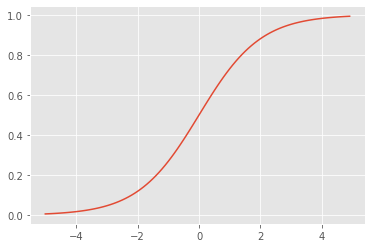

In [3]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Tangente hiperbólica 

Sea $\text{tanh}:\mathbb{R}\rightarrow [-1, 1]$ una función dada por
$$\text{tanh}(x) = \frac{e^x - e^{-x}}{e^{x}+ e^{-x}} \quad \forall x \in \mathbb{R}.$$

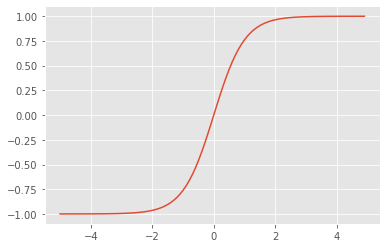

In [4]:
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## ReLu
Sea $\text{ReLU}: \mathbb{R} \rightarrow \mathbb{R}^{+}$ una función dada por 
$$\text{ReLU}(x) = \max(x, 0) \quad \forall x \in \mathbb{R}.$$

La función ReLU debe su nombre al termino rectified linear unit, es una de la funciones de activación que han obtenido importantes resultados en tiempos recientes.

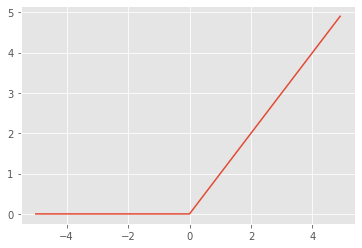

In [5]:
relu = torch.nn.ReLU()
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## PreLU
Sea $\text{PreLU}: \mathbb{R} \rightarrow \mathbb{R}^{+}$ una función dada por 
$$\text{ReLU}(x) = \max(0,x)+ a \cdot min(0,x) \quad \forall x \in \mathbb{R}.$$

Es la versión paramétrica de la función ReLU.

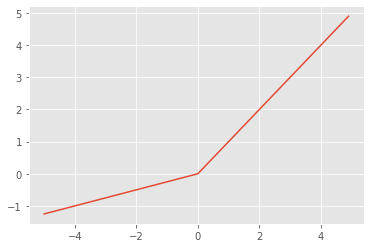

In [6]:
prelu = torch.nn.PReLU(num_parameters=1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## Softmax 
La función softmax se puede entender como la función de densidad de una variable aleatoria discreta $y$.
$$\mathbb{P}[y=i|\mathbf{x}] = \text{softmax}(\mathbf{x}) =\frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

$$\mathbf{x} = [x_1, x_2, \cdots, x_{k}]$$
Es una función muy útil para la interpretación de valores para clasificación multiclase, esta función esta dada por

In [7]:
softmax = torch.nn.Softmax(dim=1)
x = torch.rand(1, 3)
y = softmax(x)
print(x)
print(y)
print(torch.sum(y, dim=1))

tensor([[0.9551, 0.0192, 0.1045]])
tensor([[0.5496, 0.2156, 0.2348]])
tensor([1.0000])


# Función de costos (función objetivo)
## Mean Squared Error Loss (MSE)

Para problemas de regresión donde $\hat{y}$ es una predicción y $y$ es el valor real, calculamos el error por medio de la siguiente función

$$\text{MSE}\left(Y, \hat Y\right) = \frac{1}{N}\sum_{y, \hat y \in Y \times \hat Y}\left(y - \hat y\right)^2.$$

Donde $N$ el tamaño de muestra.

In [8]:
import torch.nn as nn

mse_loss = nn.MSELoss()
yhat = torch.rand(3, 5, requires_grad = True)
y = torch.rand(3, 5)
loss = mse_loss(y, yhat)
print(loss)

tensor(0.1728, grad_fn=<MseLossBackward>)


## Categorical Cross-Entropy Loss

Una función usada para la clasificación multiclase. Suponiendo que $y$ y $\hat y$ siguen una distribución multinomial de tamaño $N$, la función de costos nos dirá que tan distintos son ambos resultados

$$CEL\left(\hat Y, C\right) = \frac{1}{N}\sum_{\hat y, c_y\in \hat Y\times C}\text{loss}(\hat y, c_y)$$

$$\text{loss}(\mathbf{x}, \text{class}) = - \log\left(\frac{\exp(\mathbf x[\text{class}])}{\sum_{j} \exp(\mathbf{x}[j])}\right)$$

$$ \hat Y \in \mathbb{R}^{k \times \#C} \quad C:=\text{conjunto de clases}$$

In [9]:
ce_loss = nn.CrossEntropyLoss()
yhat = torch.rand(3, 5, requires_grad = True)
y = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(yhat, y)
print(loss)

tensor(1.5835, grad_fn=<NllLossBackward>)


## Binary Cross-Entropy Loss

Es el caso particular de la función anterior, se usa cuando únicamente trabajamos con dos clases.

In [10]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
ps = sigmoid(torch.rand(4, 1, requires_grad=True)) # probabilidades
y = torch.tensor([1, 0, 1, 0],  dtype=torch.float32).view(4, 1)
loss = bce_loss(ps, y)
print(ps)
print(loss)

tensor([[0.7229],
        [0.5011],
        [0.7133],
        [0.6604]], grad_fn=<SigmoidBackward>)
tensor(0.6094, grad_fn=<BinaryCrossEntropyBackward>)


#Clasificación multi-clase con redes neuronles artificiales

In [11]:
url = 'https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv'
data = pd.read_csv(url, delimiter=";")

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
samples, n_features = data.to_numpy().shape
(samples, n_features)

(4898, 12)

Clases:

In [14]:
clases = np.sort(data['quality'].unique())
clases

array([3, 4, 5, 6, 7, 8, 9])

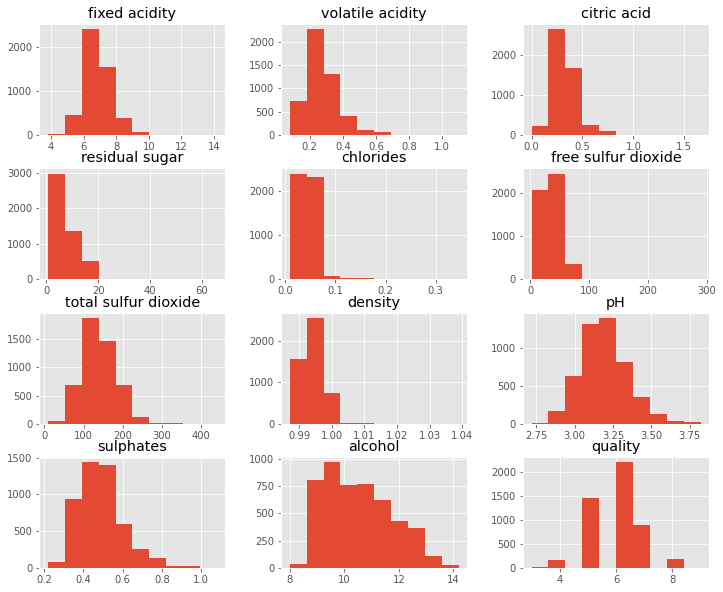

In [15]:
%matplotlib inline
data.hist(figsize=[12,10])
plt.show()

Dividimos el *dataframe* `data` en `training_data` y `test_data`, 

In [16]:
msk = np.random.rand(len(data)) < 0.9
training_data = data[msk]
test_data = data[~msk]

In [17]:
n_train = len(training_data)
n_train # cantidad de datos de entrenamiento

4398

### Media y desviación estándar de los datos de entrenamiento

In [18]:
X_train = training_data.drop('quality', axis=1)
mean_data = X_train.mean(axis=0)
mean_data

fixed acidity             6.854093
volatile acidity          0.278123
citric acid               0.333865
residual sugar            6.347146
chlorides                 0.045745
free sulfur dioxide      35.307981
total sulfur dioxide    138.160528
density                   0.994008
pH                        3.189545
sulphates                 0.489418
alcohol                  10.519022
dtype: float64

In [19]:
std_data = X_train.std(axis=0)
std_data

fixed acidity            0.847922
volatile acidity         0.100251
citric acid              0.121016
residual sugar           5.066582
chlorides                0.021731
free sulfur dioxide     17.118791
total sulfur dioxide    42.510472
density                  0.002994
pH                       0.151123
sulphates                0.113947
alcohol                  1.227139
dtype: float64

## Dataset

In [20]:
from torch.utils.data import Dataset

class DataframeDataset(Dataset):

  def __init__(self, data, y_name, transform=None, target_transform=None):
    '''
      data: pandas.DataFrame
    '''
    #self.data = torch.from_numpy(data.to_numpy()).to(dtype=torch.float32)
    self.Y = torch.tensor(data[y_name].to_numpy(), dtype=torch.long)
    aux = data.drop(y_name, axis=1).to_numpy()
    self.X = torch.from_numpy(aux).to(dtype=torch.float32)
    self.transform = transform
    self.target_transform = target_transform 

  def __len__(self):
    return self.Y.size()[0]

  def __getitem__(self, idx):
    x = self.X[idx, :]
    y = self.Y[idx]
    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)
    return x, y

### Transformaciones



In [21]:
tx = lambda x: (x - torch.tensor(mean_data, dtype=torch.float32))/torch.tensor(std_data, dtype=torch.float32)
ty = lambda y: y - torch.tensor(3, dtype=torch.long)

In [22]:
train_dataset = DataframeDataset(training_data, y_name='quality', transform=tx, target_transform=ty)
test_dataset = DataframeDataset(test_data, y_name='quality', transform=tx, target_transform=ty)

## DataLoader

In [23]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [24]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 11])
Labels batch shape: torch.Size([64])


## Declaración de una red neuronal en Pytorch

* $k :=$ tamaño de mini-batch, *batch size* (64 casi todo el tiempo).
* $n :=$ numéro de razgos (11).
* $C :=$ el conjunto de calificaciones (\{3, 4, 5, 6, 7, 8, 9\}).
* $c = \#C$

Sea $f_a( \cdot |\theta): \mathbb{R}^{k \times n}\rightarrow [0,1]^{c}$ con $a = \langle [n, 64, 64, c], \{\text{relu}, \text{relu}, \text{softmax}\}\rangle$ la red neuronal que usaremos para la tarea de clasificación. Existen varias maneras de declarar la misma arquitectura de una red neuronal en Pytorch. A continuación mostraremos como escribir $f_a $ de distintas formas.

### 1. Forma explicita.

In [25]:
n_features = n_features -1 
n_clases = len(clases)

In [26]:
import torch.nn.functional as F

# generating some random features
x = torch.randn(1, n_features) 

# define the weights
W1 = torch.randn((n_features, 64), requires_grad=True)
W2 = torch.randn((64, 64), requires_grad=True)
W3 = torch.randn((64, n_clases), requires_grad=True)

# define the bias terms
B1 = torch.randn((64), requires_grad=True)
B2 = torch.randn((64), requires_grad=True)
B3 = torch.randn((n_clases), requires_grad=True)

# calculate hidden and output layers
h1 = F.relu((x @ W1) + B1)
h2 = F.relu((h1 @ W2) + B2)
output = (h2 @ W3) + B3
output

tensor([[-182.4648,  151.9663,   13.5274,   28.2937, -213.5244,  -27.7773,
          -14.8108]], grad_fn=<AddBackward0>)

### 2. Usando la clase `torch.nn.Module`

In [27]:
from torch import nn

# define the network class of two hidden layers
class MyNetwork(nn.Module):
    def __init__(self, n_in, n_out, N):
        # call constructor from superclass
        super().__init__()
        
        # define network layers
        self.z1 = nn.Linear(n_in, N[0])
        self.z2 = nn.Linear(N[0], N[1])
        self.z3 = nn.Linear(N[1], n_out)
        
    def forward(self, x):
        # define forward pass
        x = F.relu(self.z1(x)) # h1
        x = F.relu(self.z2(x)) # h2
        x = self.z3(x) # h3 Softmax
        return x


In [28]:
N=[64, 64]
model = MyNetwork(n_features, n_clases, N)
model.forward(x)

tensor([[ 0.2083, -0.1692, -0.0794,  0.1332, -0.0129, -0.0402,  0.0272]],
       grad_fn=<AddmmBackward>)

In [29]:
model(x)

tensor([[ 0.2083, -0.1692, -0.0794,  0.1332, -0.0129, -0.0402,  0.0272]],
       grad_fn=<AddmmBackward>)

In [30]:
# print model architecture
print(model)

MyNetwork(
  (z1): Linear(in_features=11, out_features=64, bias=True)
  (z2): Linear(in_features=64, out_features=64, bias=True)
  (z3): Linear(in_features=64, out_features=7, bias=True)
)


### 3. Usando la clase `torch.nn.Sequential`

In [31]:
# define model architecture
model = nn.Sequential(
    nn.Linear(n_features, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, n_clases),
    #nn.Sigmoid()
)

In [32]:
model(x)

tensor([[-0.1154,  0.0233,  0.0276, -0.0056,  0.2334,  0.0721,  0.1131]],
       grad_fn=<AddmmBackward>)

In [33]:
# print model architecture
print(model)

Sequential(
  (0): Linear(in_features=11, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=7, bias=True)
)


Se pueden añadir nombres cada vez que se aplica una función a la información.

In [34]:
from collections import OrderedDict
# define model architecture
model = nn.Sequential(OrderedDict([
    ('z1', nn.Linear(n_features, 64)),
    ('h1', nn.ReLU()),
    ('z2', nn.Linear(64, 64)),
    ('h2', nn.ReLU()),
    ('z3', nn.Linear(64, n_clases)),
    #nn.Sigmoid()
]))

In [35]:
# instantiate the model
model(x)

tensor([[-0.0703,  0.0067, -0.2292,  0.0870, -0.1283, -0.1293, -0.1368]],
       grad_fn=<AddmmBackward>)

In [36]:
# print model architecture
print(model)

Sequential(
  (z1): Linear(in_features=11, out_features=64, bias=True)
  (h1): ReLU()
  (z2): Linear(in_features=64, out_features=64, bias=True)
  (h2): ReLU()
  (z3): Linear(in_features=64, out_features=7, bias=True)
)


También pueden agregarse modulos al modelo después de haber definido una instancia de `nn.Sequential`.

In [37]:
model = nn.Sequential()
model.add_module('z1', nn.Linear(n_features, 64))
model.add_module('h1', nn.ReLU())
model.add_module('z2', nn.Linear(64, 64))
model.add_module('h2', nn.ReLU())
model.add_module('z3', nn.Linear(64, n_clases))


In [38]:
# print model architecture
print(model)

Sequential(
  (z1): Linear(in_features=11, out_features=64, bias=True)
  (h1): ReLU()
  (z2): Linear(in_features=64, out_features=64, bias=True)
  (h2): ReLU()
  (z3): Linear(in_features=64, out_features=7, bias=True)
)


### 4. Forma mixta: `torch.nn.Module` + `torch.nn.Sequential` 

In [39]:
import torch
from torch import nn

class MyNetwork2(nn.Module):
    def __init__(self, n_in, n_out, N):
        super().__init__()
        
        # define the layers
        self.layers = nn.Sequential(
            nn.Linear(n_in, N[0]),
            nn.ReLU(),
            nn.Linear(N[0], N[1]),
            nn.ReLU(),
            nn.Linear(N[1], n_out)
        )
    
    def forward(self, x):
        # forward pass
        x = self.layers(x)
        return x

In [40]:
# instantiate the model
model = MyNetwork2(n_features, n_clases, N)

# print model architecture
print(model)

MyNetwork2(
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=7, bias=True)
  )
)


## Visualización gráfica de la arquitectura  (`torchviz`)

In [41]:
from torchviz import make_dot

yhat = model(x)
make_dot(yhat, params=dict(list(model.named_parameters()))).render("My network", format="png")

'My network.png'

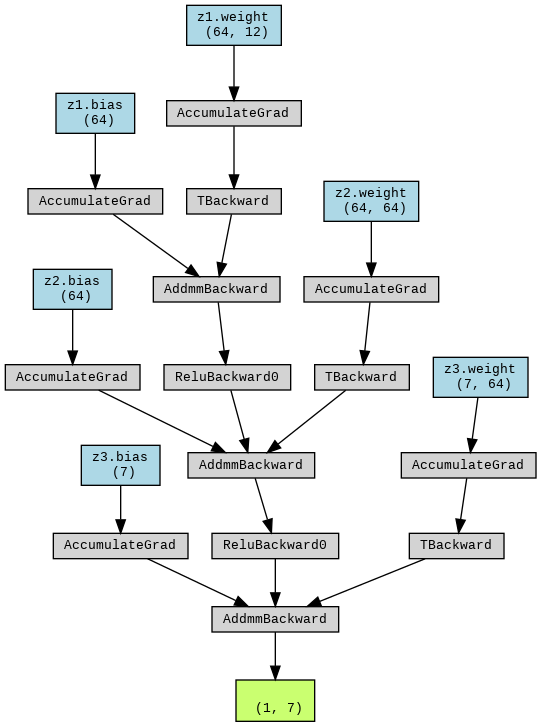

## Función objetivo y optimizador

$$\text{Problema: } \quad \min_{\theta \in \mathbb{R}^{P([11, 64, 64, 7])}}CEL\left(\theta; Y_{(b)}, \hat{Y}_{(b)}\right) \qquad \forall b \in \{1, \cdots, n_{batch}\}$$

$$\hat{Y}_{(b)} = f_a\left(X_{(b)} |\theta\right)$$

Donde $n_{batch}$ es el número de particiones que se hizo sobre el conjunto de datos de entrenamiento original.

In [42]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0005)

## Entrenamiento

In [44]:
from tqdm import tqdm

outer = tqdm(total=3, desc='Epoch', position=0)
for ii in range(3):
    inner = tqdm(total=5, desc='Batch', position=1)
    for jj in range(2):
        #do your training
        inner.update(1)
    outer.update(1)

Batch:  40%|████      | 2/5 [00:00<00:00, 182.40it/s]

Batch:  40%|████      | 2/5 [00:00<00:00, 114.56it/s]



Paso de aprendizaje por época o *epoch*.

In [46]:
def fit(model, dataloader, optimizer, criterion, pbar):
  running_loss = 0.0
  correct = 0
  total = 0
  for i, data in enumerate(dataloader, 0):
    X, Y = data
    optimizer.zero_grad() # reinicia el gradiente
    pred = model(X) # forward pass 
    loss = criterion(pred, Y) # evaluación de predicción
    loss.backward() # cálcula las derivadas 
    optimizer.step() # paso de optimización 

    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
    probs = F.softmax(pred, 1)
    label = torch.argmax(probs, dim=1)
    correct += torch.sum(label == Y).item()
    total += Y.shape[0]
    acc = correct/total
        
    pbar.set_postfix(avg_loss='{:.4f}'.format(avg_loss), acc='{:.4f}'.format(acc))
    pbar.update(Y.shape[0])
  return avg_loss, acc

Ciclo de aprendizaje.

In [47]:
import time
EPOCHS = 50
train_time = 0
epoch_loss = []
epoch_acc = []

In [48]:
for epoch in range(EPOCHS):
    start_time = time.time()
    with tqdm(total = n_train, position=0) as pbar:
        pbar.set_description(f'Epoch {epoch + 1}/'+str(EPOCHS)+' - training')
        pbar.set_postfix(avg_loss='0.0', acc='0.0')
        loss_train, acc_train = fit(model, train_dataloader, optimizer, criterion, pbar)
        train_time +=  time.time() - start_time
    
    epoch_loss.append(loss_train)
    epoch_acc.append(acc_train)

print("\n --- %s seconds ---", train_time)

Epoch 50/50 - training: 100%|██████████| 4398/4398 [00:00<00:00, 5249.85it/s, acc=0.6248, avg_loss=0.8654]


 --- %s minutes --- 41.41135621070862


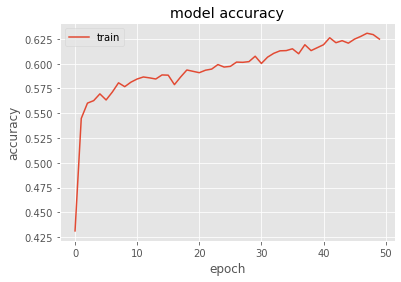

In [49]:
plt.plot(epoch_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

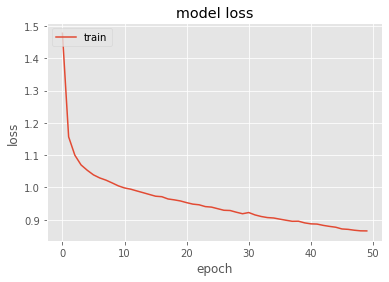

In [50]:
plt.plot(epoch_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Prueba del modelo

In [51]:
running_loss = 0.0
correct = 0
total = 0
model.eval()
for i, data in enumerate(test_dataloader, 0):
    X, Y = data        
    pred = model(X)
    loss = criterion(pred, Y)
    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
    probs = F.softmax(pred, 1)
    label = torch.argmax(probs, dim=1)
    correct += torch.sum(label == Y).item()
    total += Y.shape[0]
    acc = correct/total
        
print('accuracy: {}, loss: {}'.format(acc, avg_loss))

accuracy: 0.54, loss: 1.0798645595014096
